In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("E:\DataScience-data\Bank_churn_modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
cat=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']
con=['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

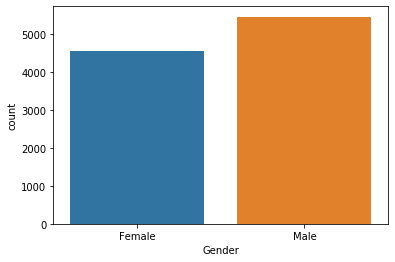

In [14]:
#univariate analysis
sns.countplot(x="Gender",data=df)
plt.show()

In [15]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

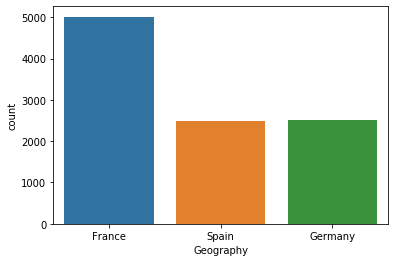

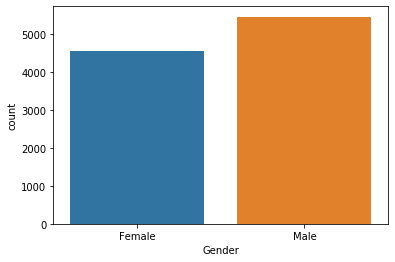

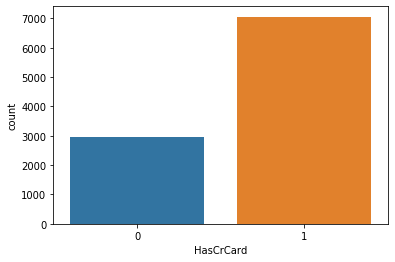

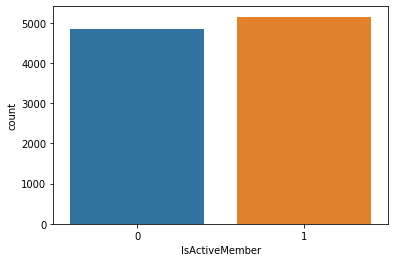

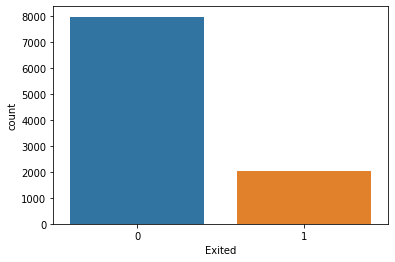

In [16]:
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

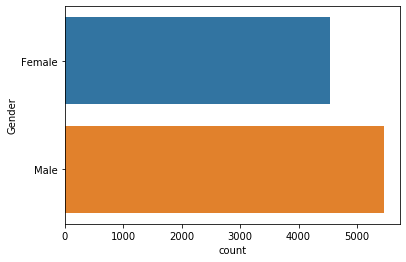

In [17]:
sns.countplot(y="Gender",data=df)
plt.show()

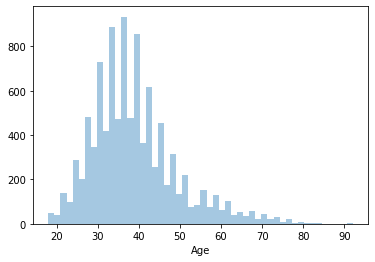

In [18]:
sns.distplot(df["Age"],kde=False,bins=50)
plt.show()

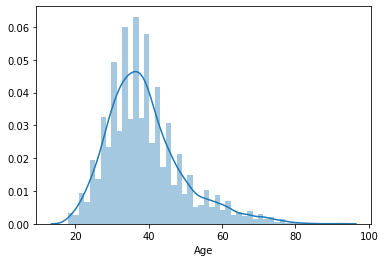

In [19]:
sns.distplot(df["Age"])
plt.show()

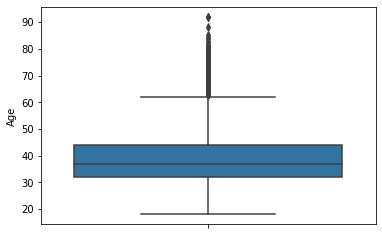

In [20]:
sns.boxplot(y=df["Age"])
plt.show()

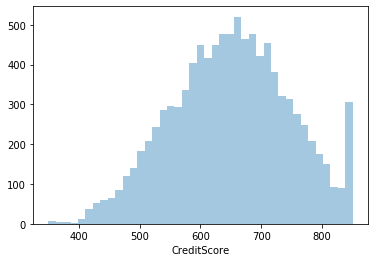

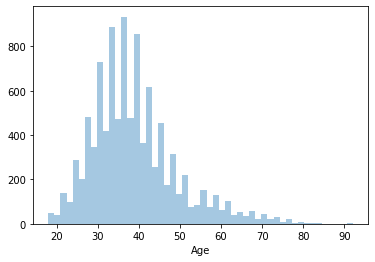

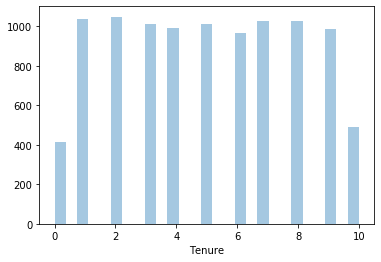

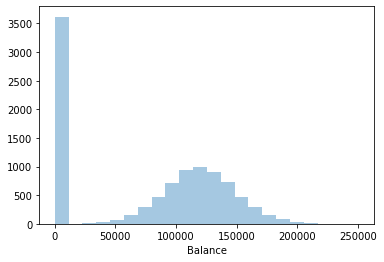

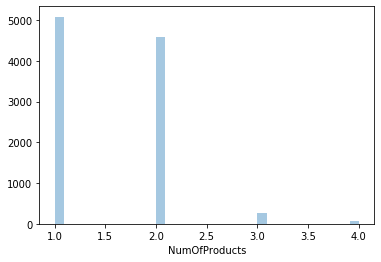

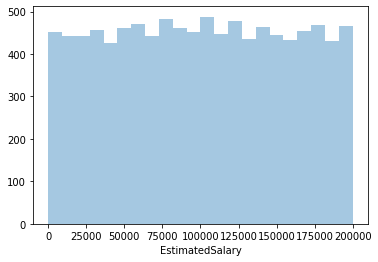

In [21]:
for i in con:
    sns.distplot(df[i],kde=False)
    plt.show()

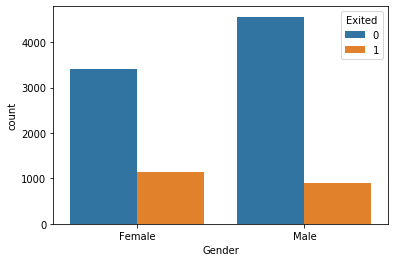

In [22]:
#plt.figure(figsize=(10,10))
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

In [49]:
a=pd.crosstab(df["Gender"],df["Exited"],margins=True)

In [50]:
a

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [27]:
a[1]/a["All"]

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

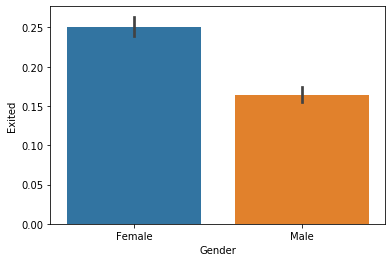

In [28]:
sns.barplot(x="Gender",y="Exited",data=df)
plt.show()

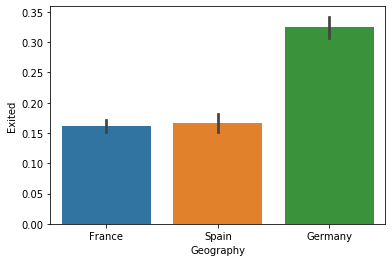

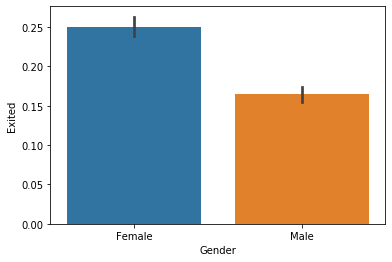

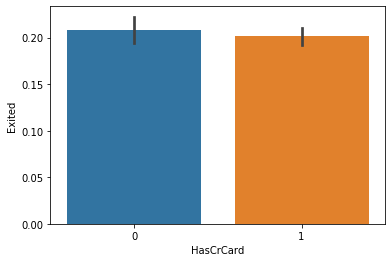

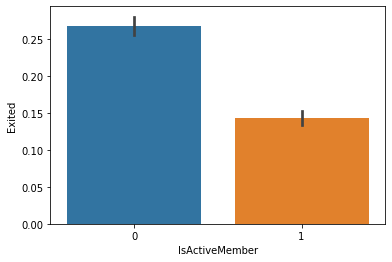

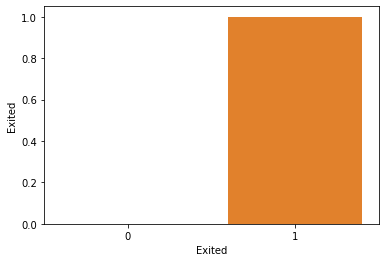

In [31]:
for i in cat:
    sns.barplot(x=i,y="Exited",data=df)
    plt.show()

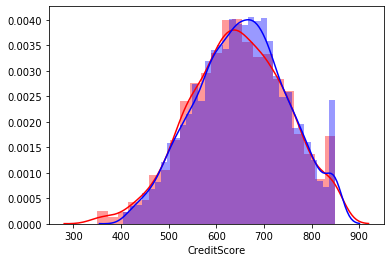

In [43]:
sns.distplot(df["CreditScore"][df["Exited"]==1],color='r')
sns.distplot(df["CreditScore"][df["Exited"]==0],color='b')
plt.show()

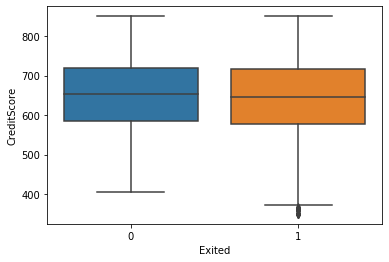

In [44]:

sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.show()

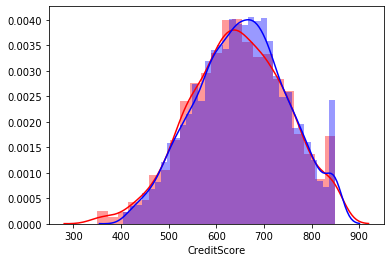

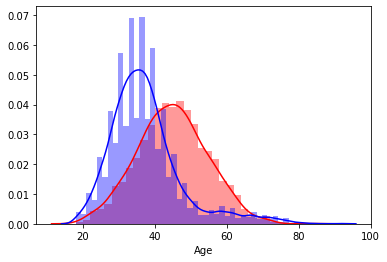

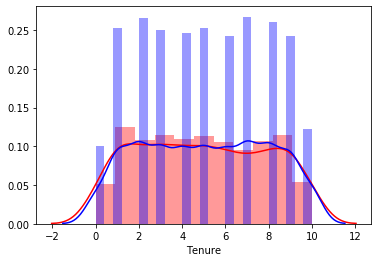

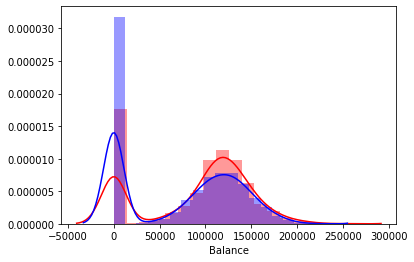

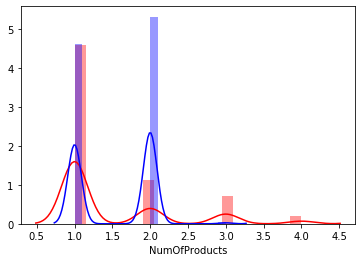

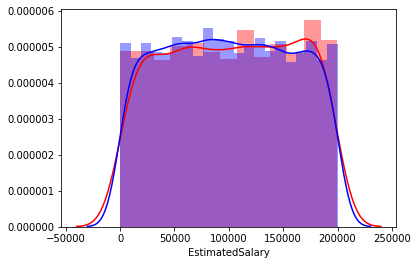

In [45]:
for i in con:
    sns.distplot(df[i][df["Exited"]==1],color='r')
    sns.distplot(df[i][df["Exited"]==0],color='b')
    plt.show()
    

In [ ]:
if

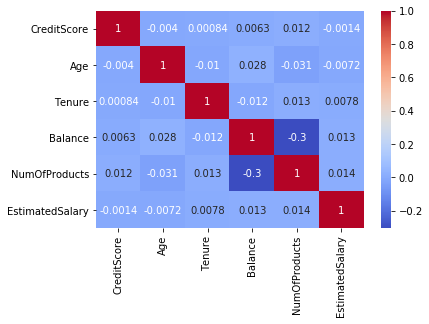

In [55]:

cor=df[con].corr()
#plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

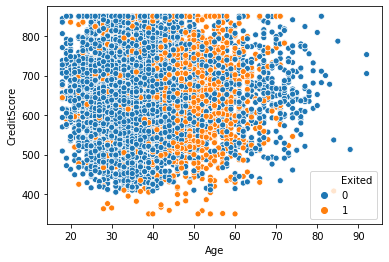

In [59]:
sns.scatterplot(df["Age"],df["CreditScore"],hue=df['Exited'])
plt.show()